In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
latest = pd.read_html("https://www.mohfw.gov.in/")[0]


In [27]:
latest

Empty DataFrame
Columns: [(S. No., S. No.), (Name of State / UT, Name of State / UT), (Active Cases*, Total), (Active Cases*, Change since yesterdayChange since yesterday), (Cured/Discharged/Migrated*, Cumulative), (Cured/Discharged/Migrated*, Change since yesterday), (Deaths**, Cumulative), (Deaths**, Change since yesterday)]
Index: []

In [6]:
latest = latest.drop(['S. No.'], axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [7]:

latest.columns = ['State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths']

ValueError: ignored

In [ ]:

latest['Date'] = str(datetime.date.today())

In [ ]:
latest.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Date
0,Andhra Pradesh,7,0,0,0.0,2020-03-24
1,Bihar,2,0,0,1.0,2020-03-24
2,Chhattisgarh,1,0,0,0.0,2020-03-24
3,Delhi,30,1,6,1.0,2020-03-24
4,Gujarat,29,0,0,1.0,2020-03-24


In [ ]:
latest = latest[:-1]

In [ ]:
old_covid = pd.read_csv("covid.csv")

In [ ]:
old_covid.head()

,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Date,Deaths,State/UnionTerritory
0,0,1,0,2020-01-30,0,Kerala
1,0,1,0,2020-01-31,0,Kerala
2,0,2,0,2020-02-01,0,Kerala
3,0,3,0,2020-02-02,0,Kerala
4,0,3,0,2020-02-03,0,Kerala


In [ ]:
old_covid = old_covid[old_covid['Date'] != str(datetime.date.today())]

In [ ]:
old_covid.head()

,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Date,Deaths,State/UnionTerritory
0,0,1,0,2020-01-30,0,Kerala
1,0,1,0,2020-01-31,0,Kerala
2,0,2,0,2020-02-01,0,Kerala
3,0,3,0,2020-02-02,0,Kerala
4,0,3,0,2020-02-03,0,Kerala


In [ ]:
covid = pd.concat([old_covid, latest], ignore_index=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [ ]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [ ]:
covid.head()

,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Date,Deaths,State/UnionTerritory
0,0,1,0,2020-01-30,0.0,Kerala
1,0,1,0,2020-01-31,0.0,Kerala
2,0,2,0,2020-02-01,0.0,Kerala
3,0,3,0,2020-02-02,0.0,Kerala
4,0,3,0,2020-02-03,0.0,Kerala


In [ ]:
beds = pd.read_csv('HospitalBedsIndia.csv')
beds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27.0,575.0,3.0,500.0,NaN,NaN
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,NaN,NaN
2,3.0,Arunachal Pradesh,122,62,NaN,15,199,2320,208.0,2136.0,10.0,268.0,NaN,NaN
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,NaN,NaN
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,NaN,NaN


In [ ]:
census = pd.read_csv("population_india_census2011.csv")
census.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Sex Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [ ]:
census.drop(['Sno'],axis=1)

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Sex Ratio
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
5,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
6,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
7,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
8,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919
9,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 6 columns):
ConfirmedForeignNational    339 non-null int64
ConfirmedIndianNational     339 non-null int64
Cured                       339 non-null int64
Date                        339 non-null datetime64[ns]
Deaths                      339 non-null float64
State/UnionTerritory        339 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 16.0+ KB


In [ ]:
covid['ConfirmedForeignNational'] = covid['ConfirmedForeignNational'].apply(int)
covid['ConfirmedIndianNational'] = covid['ConfirmedIndianNational'].apply(int)

In [ ]:
covid['Total Active'] = covid['ConfirmedForeignNational'] + covid['ConfirmedIndianNational'] - covid['Cured']
covid['Total'] = covid['ConfirmedForeignNational'] + covid['ConfirmedIndianNational']

In [ ]:
india = covid.groupby('Date').sum()
india

,ConfirmedForeignNational,ConfirmedIndianNational,Cured,Deaths,Total Active,Total
Date,,,,,,
2020-01-30,0,1,0,0.0,1,1
2020-01-31,0,1,0,0.0,1,1
2020-02-01,0,2,0,0.0,2,2
2020-02-02,0,3,0,0.0,3,3
2020-02-03,0,3,0,0.0,3,3
2020-02-04,0,3,0,0.0,3,3
2020-02-05,0,3,0,0.0,3,3
2020-02-06,0,3,0,0.0,3,3
2020-02-07,0,3,0,0.0,3,3


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [ ]:
  pip install plotly


The following command must be run outside of the IPython shell:

    $ pip install plotly

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
import cufflinks as cf

In [ ]:
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
india[['Total','ConfirmedIndianNational','ConfirmedForeignNational']].iplot(
    title='CUMULATIVE COUNT',
    colors={'Total':'black','ConfirmedIndianNational':'orange',
            'ConfirmedForeignNational':'blue'}, width=2.5,
    xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [ ]:
india[['Total Active','Cured','Deaths']].iplot(title='[ACTIVE CASES]\nHOSPITALIZED vs CURED vs DEATH',
                                      colors={'Total Active':'blue','Cured':'green','Deaths':'red'}, width=2.5
                                              ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [ ]:
india['Safe-Zone'] = india['Total']*0.8

In [ ]:
india[['Total','Safe-Zone']].iplot(title='CUMULATIVE COUNT',
                    colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [ ]:
init = 0
ls = []
for x in india['Total']:
    ls.append(x-init)
    init=x
print(ls)
india['Rise'] = ls

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 22, 2, 1, 3, 5, 7, 12, 2, 14, 7, 3, 26, 4, 23, 14, 22, 50, 60, 77, 73, 59]


In [ ]:
india['Rise'].iplot(kind='bar', sharing='public', title='DAILY RISE IN CASES', colors={'Rise':'indigo'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [ ]:
states = latest.copy()
states.drop(['Date'], axis=1, inplace=True)
states['ConfirmedForeignNational']=states['ConfirmedForeignNational'].apply(int)
states['ConfirmedIndianNational']=states['ConfirmedIndianNational'].apply(int)
states['Total'] = states['ConfirmedForeignNational']+states['ConfirmedIndianNational']
states.set_index('State/UnionTerritory', inplace=True)
states

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total
State/UnionTerritory,,,,,
Andhra Pradesh,7,0,0,0.0,7
Bihar,2,0,0,1.0,2
Chhattisgarh,1,0,0,0.0,1
Delhi,30,1,6,1.0,31
Gujarat,29,0,0,1.0,29
Haryana,12,14,11,0.0,26
Himachal Pradesh,3,0,0,1.0,3
Karnataka,37,0,2,1.0,37
Kerala,87,8,4,0.0,95


In [ ]:
states.iplot(kind='bar')

In [ ]:
map_state = states.copy()

In [ ]:
map_state.index = ['Andhra Pradesh', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Chandigarh', 'Jammu & Kashmir', 'Ladakh',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [ ]:
map_state.loc['Jammu & Kashmir'] = map_state.loc['Jammu & Kashmir']+map_state.loc['Ladakh']

In [ ]:
import geopandas as gpd

In [ ]:
import descartes

In [ ]:
import shapefile as shp

In [ ]:
fp = "Indian_States.shp"
map_df = gpd.read_file(fp)

In [ ]:
map_df=map_df.set_index('st_nm')
map_df.index 

Index(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Odisha', 'Andhra Pradesh'],
      dtype='object', name='st_nm')

In [ ]:
merged = map_df.join(map_state) #with index as statename
merged['Total'].fillna(0, inplace=True)
merged

,geometry,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total
st_nm,,,,,,
Andaman & Nicobar Island,(POLYGON ((93.71975948121514 7.207067636262479...,NaN,NaN,NaN,NaN,0.0
Arunanchal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,...",NaN,NaN,NaN,NaN,0.0
Assam,"(POLYGON ((89.74322932956994 26.3036203411059,...",NaN,NaN,NaN,NaN,0.0
Bihar,(POLYGON ((84.50719832504274 24.26323103208654...,2.0,0.0,0.0,1.0,2.0
Chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,...",6.0,0.0,0.0,0.0,6.0
Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,...",1.0,0.0,0.0,0.0,1.0
Dadara & Nagar Havelli,"POLYGON ((73.20656615030765 20.12215606165296,...",NaN,NaN,NaN,NaN,0.0
Daman & Diu,(POLYGON ((72.89334544683499 20.44538762783679...,NaN,NaN,NaN,NaN,0.0
Goa,(POLYGON ((74.11917887850251 14.75344075069012...,NaN,NaN,NaN,NaN,0.0


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



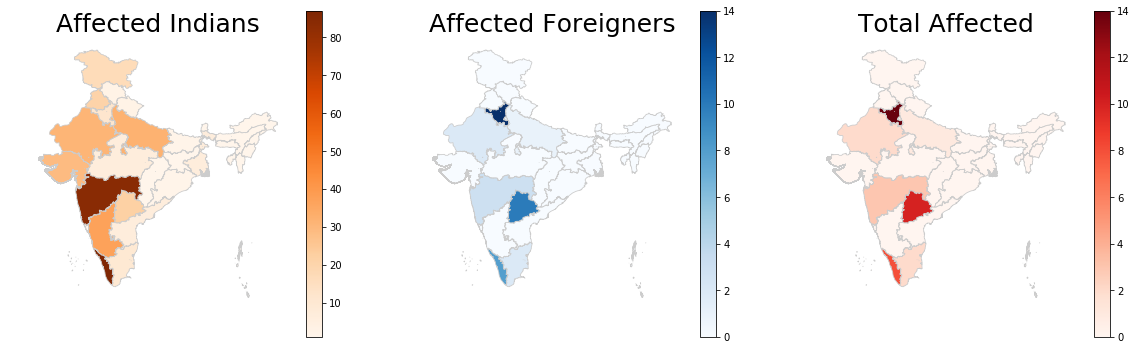

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Affected Indians', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='ConfirmedIndianNational', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Affected Foreigners', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='ConfirmedForeignNational', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=2
    else:
        ax.axis('off')
        ax.set_title('Total Affected', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='ConfirmedForeignNational', cmap='Reds', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [ ]:
fig.savefig("statewise_affected.png", dpi=1000) ##for saving images

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



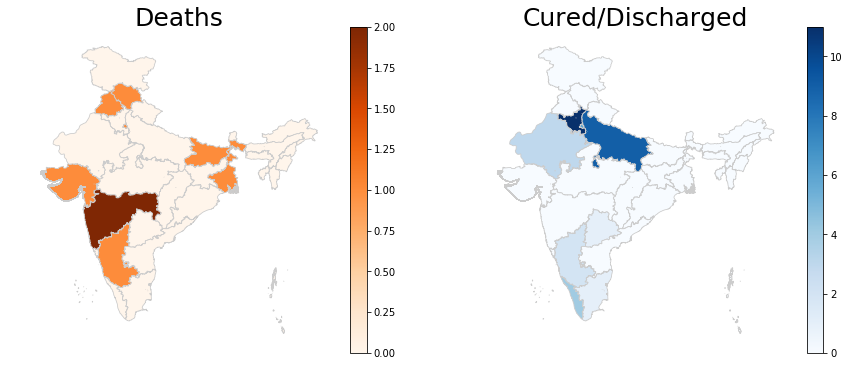

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Deaths', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Cured/Discharged', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Cured', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        

In [ ]:
fig.savefig("death_cure.png", dpi=1000)